## Week 2 - Titanic dataset analysis

In this exercise, we'll continue to study the Titanic data set which was used in Exercise 1.1. Now that we have preprocessed it a bit, it's time to do some exploratory data analysis.


- To give a more complete picture of the two groups, provide graphical displays of the distribution of the variables in each group whenever appropriate (not, e.g., on the ticket number).

- One step further is the analysis of pairwise and multivariate relationships between the variables in the two groups. Try to visualize two variables at a time using, e.g., scatter plots and use a different color to display the survival status. Hint: to better show many data points with the same value for a given variable, you can use either transparency of 'jitter'.

- Try to come up with visualizations that best brings forth the differences between the two groups of passengers.

- Finally, recall the preprocessing that was carried out in last week's exercises. Can you say something about the effect of the choices that were made, in particular, to use the mode or the mean to impute missing values, instead of, for example, ignoring passengers with missing data?

# Data Dictionary

### Variable	Definition	Key
survival	Survival 0 = No, 1 = Yes

pclass	Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


## Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


In [2]:
import pandas as pd
import qgrid
qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folder
qgrid.set_defaults(remote_js=True)

In [3]:
# Read the dataframe
pd.set_option('display.max_rows', 8)
df = pd.read_csv('../output/titanic.csv')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Sex_num,Embarked_num,Deck_num
0,1,0,3,male,22,1,0,7.2500,S,C,0,0,0
1,2,1,1,female,38,1,0,71.2833,C,C,1,1,0
2,3,1,3,female,26,0,0,7.9250,S,C,1,0,0
3,4,1,1,female,35,1,0,53.1000,S,C,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,female,19,0,0,30.0000,S,B,1,0,5
888,889,0,3,female,30,1,2,23.4500,S,C,1,0,0
889,890,1,1,male,26,0,0,30.0000,C,C,0,1,0
890,891,0,3,male,32,0,0,7.7500,Q,C,0,2,0


### 1-) Most frequent values
First consider each feature variable in turn. For categorical variables, find out the most frequent value, i.e., the mode. For numerical variables, calculate the median value.

In [4]:
cat_cols = ['Pclass', 'Embarked', 'Deck', 'SibSp', 'Parch']
num_cols = ['Age', 'Fare']
f_cols = cat_cols + num_cols
model = {col: None for col in f_cols}

In [5]:
# Categorical values' most freq things
for c in cat_cols:
    f = df[c].mode()[0]
    model[c] = f
    print("COL: {0:10}    MODE: {1}".format(c, f))

COL: Pclass        MODE: 3
COL: Embarked      MODE: S
COL: Deck          MODE: C
COL: SibSp         MODE: 0
COL: Parch         MODE: 0


In [6]:
# Numerical values' most freq things
for c in num_cols:
    f = df[c].median()
    model[c] = f
    print("COL: {0:4}    MEDIAN: {1}".format(c, f))

COL: Age     MEDIAN: 30.0
COL: Fare    MEDIAN: 14.4542


### 2-) Create Sub-models

Combining the modes of the categorical variables, and the medians of the numerical variables, construct an imaginary "average Joe" on board of the ship. Also following the same procedure for using subsets of the passengers, construct the "average survivor Jane" and the "average non-survivor Joe".

In [7]:
model

{'Age': 30.0,
 'Deck': 'C',
 'Embarked': 'S',
 'Fare': 14.4542,
 'Parch': 0,
 'Pclass': 3,
 'SibSp': 0}

In [8]:
def imaginary_model(sex, survived, desc):
    m = model.copy()
    m['Sex'] = str(sex)
    m['Survived'] = int(survived)
    m['Description'] = str(desc)
    return m

### - Create all sub-models using 'most' freq model

In [9]:
joe = imaginary_model('male', 1, 'Average Surviving Joe')
jane = imaginary_model('female', 1, 'Average Surviving Jane')
dead_joe = imaginary_model('male', 0, 'Average Dead Joe')
dead_jane = imaginary_model('female', 0, 'Average Dead Jane')

### 3-) Study distributions

- Now study the distributions of the variables in the two groups. How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the representative of their own group (survivor/non- survivor)? Can you find passengers that are very similar to the representative of the other group?

- Note that this task may be hard to complete since it would require that you sift through lots of data. And this is quite a small data set! Find ways to explore the data which facilitate this kind of investigation. You are free to choose your methods: non-graphical/graphical, static/interactive -- anything goes.

In [10]:
jane

{'Age': 30.0,
 'Deck': 'C',
 'Description': 'Average Surviving Jane',
 'Embarked': 'S',
 'Fare': 14.4542,
 'Parch': 0,
 'Pclass': 3,
 'Sex': 'female',
 'SibSp': 0,
 'Survived': 1}

### Average Joe record
- Survive = 1, Pclass = 3, Sex = male, Age = 30,31, Deck = C
    - Found 11 people
- Fare doesn't correlate about survival
- Pclass = 3 has more survivor, but it is still small dataset
- Example passenger, Index 17
    - Almost fits, Fare is 13

### Average Jane record
- Average Jane fitted onto more people with same specifications
    - More than 11 people, approx. 25
- Example passengers, Index: 79, 747, Again Fare not exact, but close

### Dead Joe
- There are even more dead joes
- Index 496

### Dead Jane
- Looks like dead janes are as much as the survived janes
- Index 141

In [11]:
qgrid.show_grid(df[(df.Survived == 0) & (df.Pclass == 3) & (df.Age <= 31.0) & (df.Age >= 29.0) & (df.Deck == 'C')])

### 4-)Plotting
To give a more complete picture of the two groups, provide graphical displays of the distribution of the variables in each group whenever appropriate (not, e.g., on the ticket number).

In [12]:
def deck_counter(sex, survival):
    series = pd.Series(0, index=df.Deck.unique())
    for c in series.keys():
            series.loc[c] = len(df[(df.Sex == sex) & (df.Survived == survival) & (df.Deck == c)])
    return series

In [13]:
ms_decks = deck_counter('male', 1)
md_decks = deck_counter('male', 0)
male_decks = pd.concat([ms_decks, md_decks], axis=1)
male_decks.columns = ['MaleSurvived', 'MaleDead']

In [14]:
fs_decks = deck_counter('female', 1)
fd_decks = deck_counter('female', 0)
female_decks = pd.concat([fs_decks, fd_decks], axis=1)
female_decks.columns = ['FemaleSurvived', 'FemaleDead']

In [15]:
%matplotlib inline

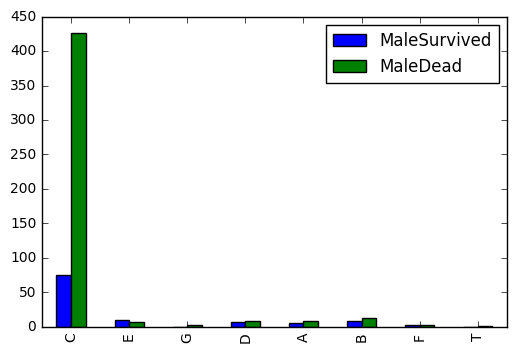

In [16]:
male_decks.plot.bar()

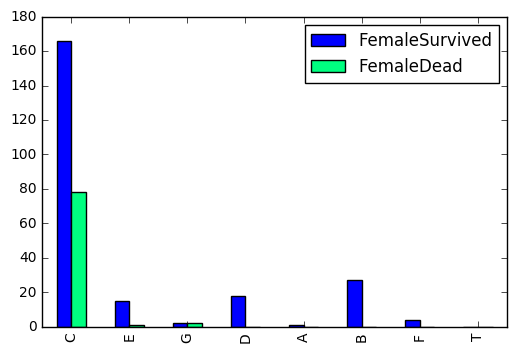

In [17]:
female_decks.plot.bar(colormap='winter')

### Try to get the Survival rate across the age
- X axis shows the Age distribution
- Y axis shows the number of people that is Survived
    - We can also put the dead line as well to show the downwards trend
### Show with the line charts

In [30]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [104]:
surv_age = pd.DataFrame()
surv_age['s'] = df['Survived']
surv_age['a'] = df['Age']
ages = pd.Series()
ages = surv_age.a.unique()

print(ss.head(5))
print(len(df.Age[(df.Age == 4) & (df.Survived == 1)]))
ages.sort()
age_surv = []
for a in ages:
    d = {'age': a, 'np': len(df.Age[(df.Age == a) & (df.Survived == 1)])}
    age_surv.append(d)
as_df = pd.DataFrame(age_surv)
age_dead = []
for a in ages:
    d = {'age': a, 'np': len(df.Age[(df.Age == a) & (df.Survived == 0)])}
    age_dead.append(d)
ad_df = pd.DataFrame(age_dead)

      a
a s    
0 1   0
1 1  11
2 1   6
3 1  15
4 1  28
7


In [113]:
trace1 = go.Bar(
            x=as_df.age,
            y=as_df.np,
    name='Survived'
)

trace2 = go.Bar(
            x=ad_df.age,
            y=ad_df.np,
    name='Dead'
)


data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')